[*********************100%***********************]  1 of 1 completed


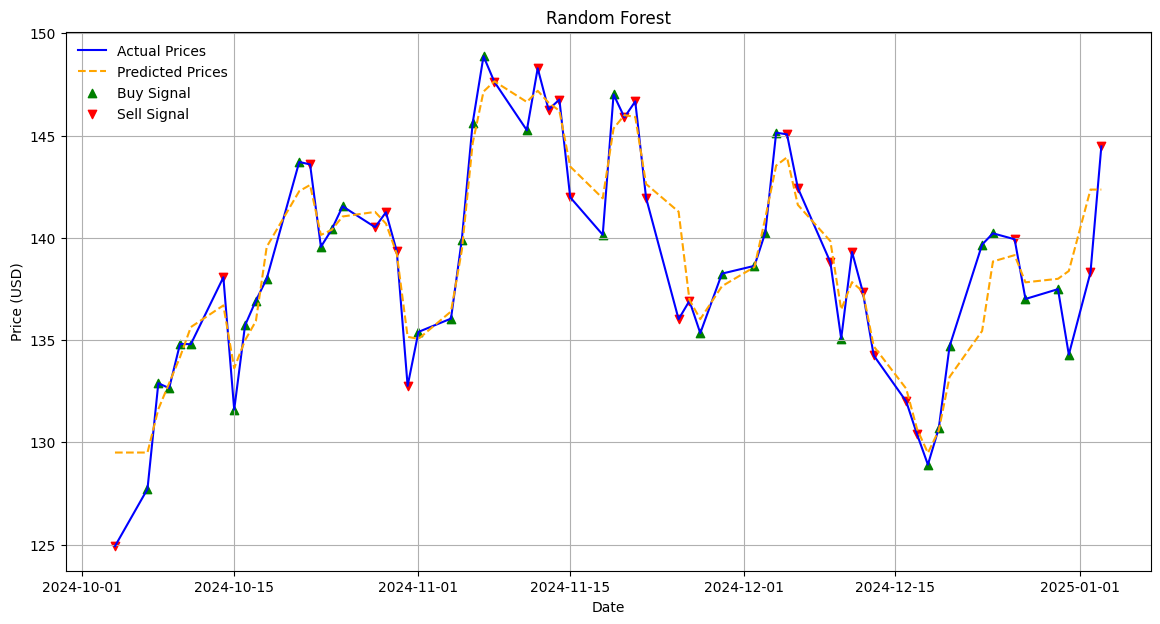

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mplcursors

# Fetch NVDA stock data from Yahoo Finance
symbol = "NVDA"
data = yf.download(symbol, period="3mo")

# Prepare the data
data['Date'] = data.index
data['Day'] = np.arange(len(data))

# Features and Target
X = data[['Day']]
y = data['Close'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.ravel())

# Predictions
predicted_prices = rf.predict(X)
data['Predicted'] = predicted_prices

# Identify Buy and Sell Signals
data['Signal'] = np.where(data['Predicted'].shift(-1) > data['Predicted'], 'Buy', 'Sell')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Prices', color='blue')
plt.plot(data['Date'], data['Predicted'], label='Predicted Prices', color='orange', linestyle='dashed')

# Highlight Buy and Sell Signals
buy_signals = data[data['Signal'] == 'Buy']
sell_signals = data[data['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

# Add labels and legend
plt.title("Random Forest")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()

# Move legend to the top-left corner
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Add interactive cursor
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"{sel.artist.get_label()}\nDate: {data['Date'][sel.index]}\nPrice: ${data['Close'][sel.index]:.2f}"))

plt.show()


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Accuracy Metrics
mae = mean_absolute_error(y, predicted_prices)
mse = mean_squared_error(y, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.17
Mean Squared Error (MSE): 2.62
Root Mean Squared Error (RMSE): 1.62
R² Score: 0.91
